In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from math import sqrt
import datetime
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
start_time=datetime.datetime.now()
print(start_time)

2023-05-09 14:53:32.225407


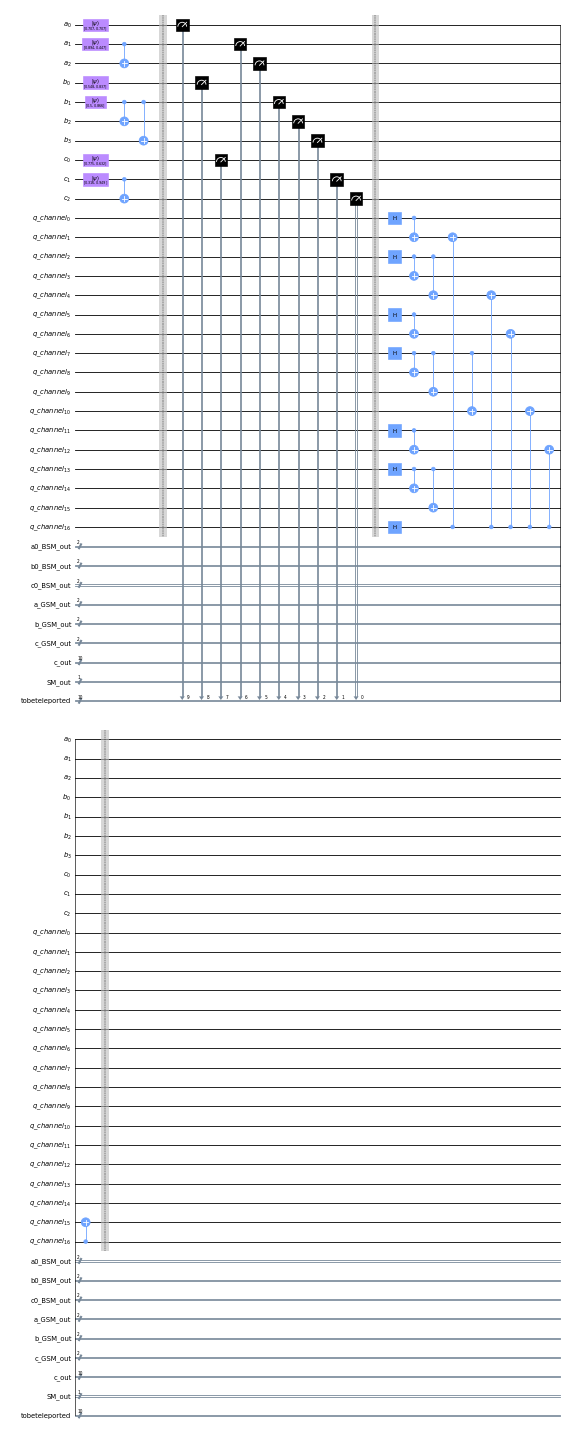

In [2]:
# initialize quantum state

q_channel = QuantumRegister(17, 'q_channel')
# quantum state to be transmitted
a =QuantumRegister(3,'a')
b =QuantumRegister(4,'b')
c =QuantumRegister(3,'c')
# classical register of ten quantum measurement outcomes 
c_out = ClassicalRegister(10,'c_out')
# classical register of BSM output results
a0_BSM_out = ClassicalRegister(2,'a0_BSM_out')
b0_BSM_out = ClassicalRegister(2,'b0_BSM_out')
c0_BSM_out = ClassicalRegister(2,'c0_BSM_out')
#  classical register of GSM output results
a_GSM_out = ClassicalRegister(2,'a_GSM_out')
b_GSM_out = ClassicalRegister(2,'b_GSM_out')
c_GSM_out = ClassicalRegister(2,'c_GSM_out')

SM_out = ClassicalRegister(1,'SM_out')
tobeteleported = ClassicalRegister(10,'tobeteleported')

qc_circuit = QuantumCircuit(a,b,c, q_channel,a0_BSM_out,b0_BSM_out,c0_BSM_out,a_GSM_out,b_GSM_out,c_GSM_out,c_out,SM_out,tobeteleported)

#  initialize particles for transmission
initial_state_a0 = [np.sqrt(0.50),np.sqrt(0.50)]
initial_state_a1 = [np.sqrt(0.80),np.sqrt(0.20)]
initial_state_b0 = [np.sqrt(0.30),np.sqrt(0.70)]
initial_state_b1 = [np.sqrt(0.25),np.sqrt(0.75)]
initial_state_c0 = [np.sqrt(0.60),np.sqrt(0.40)]
initial_state_c1 = [np.sqrt(0.10),np.sqrt(0.90)]

qc_circuit.initialize(initial_state_a0,a[0])
qc_circuit.initialize(initial_state_a1,a[1])
qc_circuit.initialize(initial_state_b0,b[0])
qc_circuit.initialize(initial_state_b1,b[1])
qc_circuit.initialize(initial_state_c0,c[0])
qc_circuit.initialize(initial_state_c1,c[1])

qc_circuit.cx(a[1],a[2])
qc_circuit.cx(b[1],b[2])
qc_circuit.cx(b[1],b[3])
qc_circuit.cx(c[1],c[2])

qc_circuit.barrier(a,b,c,q_channel)

# Measure the particles to be transmitted and store the measurement results in a classical register
qc_circuit.measure(a[0],tobeteleported[9])
qc_circuit.measure(b[0],tobeteleported[8])
qc_circuit.measure(c[0],tobeteleported[7])

qc_circuit.measure(a[1],tobeteleported[6])
qc_circuit.measure(a[2],tobeteleported[5])

qc_circuit.measure(b[1],tobeteleported[4])
qc_circuit.measure(b[2],tobeteleported[3])
qc_circuit.measure(b[3],tobeteleported[2])


qc_circuit.measure(c[1],tobeteleported[1])
qc_circuit.measure(c[2],tobeteleported[0])
qc_circuit.barrier(a,b,c,q_channel)


# initialize a 17-qubit quantum channel
qc_circuit.h(q_channel[0])
qc_circuit.h(q_channel[2])
qc_circuit.h(q_channel[5])
qc_circuit.h(q_channel[7])
qc_circuit.h(q_channel[11])
qc_circuit.h(q_channel[13])
qc_circuit.h(q_channel[16])
# CNOT gate operation
qc_circuit.cx(q_channel[0],q_channel[1])
qc_circuit.cx(q_channel[2],q_channel[3])
qc_circuit.cx(q_channel[2],q_channel[4])
qc_circuit.cx(q_channel[5],q_channel[6])
qc_circuit.cx(q_channel[7],q_channel[8])
qc_circuit.cx(q_channel[7],q_channel[9])
qc_circuit.cx(q_channel[7],q_channel[10])
qc_circuit.cx(q_channel[11],q_channel[12])
qc_circuit.cx(q_channel[13],q_channel[14])
qc_circuit.cx(q_channel[13],q_channel[15])

qc_circuit.cx(q_channel[16],q_channel[1])
qc_circuit.cx(q_channel[16],q_channel[4])
qc_circuit.cx(q_channel[16],q_channel[6])
qc_circuit.cx(q_channel[16],q_channel[10])
qc_circuit.cx(q_channel[16],q_channel[12])
qc_circuit.cx(q_channel[16],q_channel[15])

qc_circuit.barrier(a,b,c,q_channel)
qc_circuit.draw(output='mpl',scale=0.3)


{'1100000000 0 0000000000 00 00 00 00 00 00': 18, '0111111100 0 0000000000 00 00 00 00 00 00': 12, '0110011111 0 0000000000 00 00 00 00 00 00': 410, '0000000011 0 0000000000 00 00 00 00 00 00': 111, '1110000011 0 0000000000 00 00 00 00 00 00': 155, '1000000000 0 0000000000 00 00 00 00 00 00': 9, '1100011111 0 0000000000 00 00 00 00 00 00': 683, '0110000011 0 0000000000 00 00 00 00 00 00': 144, '1111111100 0 0000000000 00 00 00 00 00 00': 10, '0000011111 0 0000000000 00 00 00 00 00 00': 295, '0100011111 0 0000000000 00 00 00 00 00 00': 701, '1000011100 0 0000000000 00 00 00 00 00 00': 39, '0001111100 0 0000000000 00 00 00 00 00 00': 7, '0111111111 0 0000000000 00 00 00 00 00 00': 109, '1111100011 0 0000000000 00 00 00 00 00 00': 40, '1010011111 0 0000000000 00 00 00 00 00 00': 210, '0101100011 0 0000000000 00 00 00 00 00 00': 69, '1110011111 0 0000000000 00 00 00 00 00 00': 474, '0111100011 0 0000000000 00 00 00 00 00 00': 40, '1111111111 0 0000000000 00 00 00 00 00 00': 116, '101111110

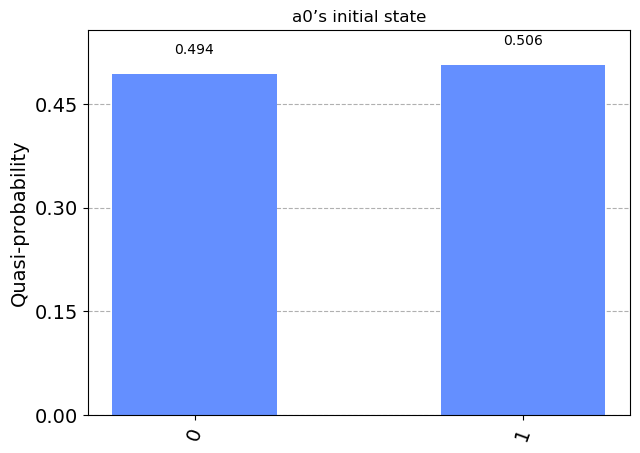

In [3]:
# Run the simulator and obtain measurement results for initial states
simulator = Aer.get_backend('aer_simulator')
circ_sim = transpile(qc_circuit, simulator)
result = simulator.run(circ_sim, shots=6000).result()
counts = result.get_counts(circ_sim)
print(counts)
print('Done')
a0_0 = 0
a0_1 = 0
j=0
for a0_state in counts:
    j=j+1
    if (a0_state[0]=='0'):
        a0_0 = a0_0+counts[a0_state]/sum(counts.values())
    if (a0_state[0]=='1'):
        a0_1 = a0_1+counts[a0_state]/sum(counts.values())
counts_out_a0 = {'0':a0_0,'1':a0_1}
plot_histogram(counts_out_a0,title='a0’s initial state')

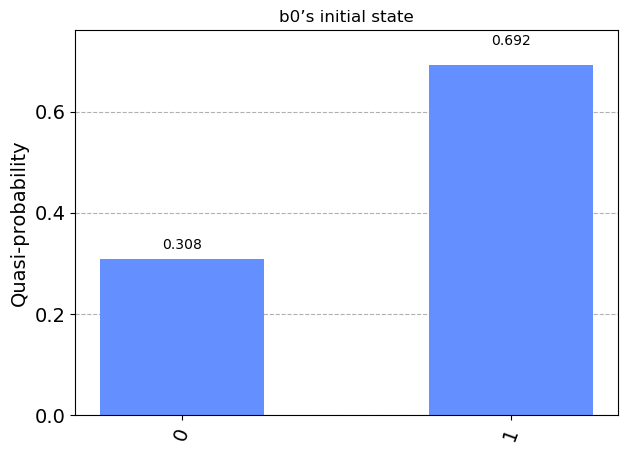

In [4]:
# Count the number of measurement results for b0
b0_0 = 0
b0_1 = 0
j=0
for b0_state in counts:
    j=j+1
    if (b0_state[1]=='0'):
        b0_0 = b0_0+counts[b0_state]/sum(counts.values())
    if (b0_state[1]=='1'):
        b0_1 = b0_1+counts[b0_state]/sum(counts.values())
counts_out_b0 = {'0':b0_0,'1':b0_1}
plot_histogram(counts_out_b0,title='b0’s initial state')

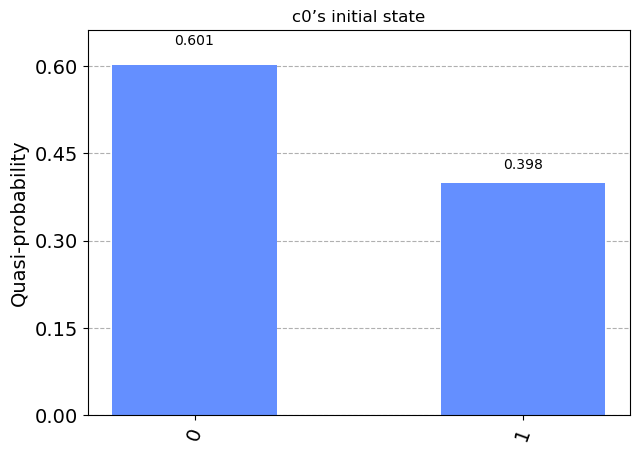

In [5]:
# Count the number of measurement results for c0
c0_0 = 0
c0_1 = 0
j=0
for c0_state in counts:
    j=j+1
    if (c0_state[2]=='0'):
        c0_0 = c0_0+counts[c0_state]/sum(counts.values())
    if (c0_state[2]=='1'):
        c0_1 = c0_1+counts[c0_state]/sum(counts.values())
counts_out_c0 = {'0':c0_0,'1':c0_1}
plot_histogram(counts_out_c0,title='c0’s initial state')

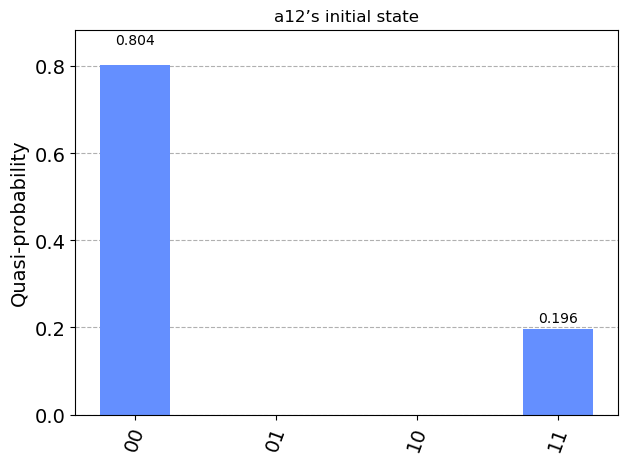

In [6]:
# Count the number of measurement results for a1a2
a12_00 = 0
a12_01 = 0
a12_10 = 0
a12_11 = 0
j=0
for a12_state in counts:
    j=j+1
    if (a12_state[3:5]=='00'):
        a12_00 = a12_00+counts[a12_state]/sum(counts.values())
    if (a12_state[3:5]=='01'):
        a12_01 = a12_01+counts[a12_state]/sum(counts.values())
    if (a12_state[3:5]=='10'):
        a12_10 = a12_10+counts[a12_state]/sum(counts.values())
    if (a12_state[3:5]=='11'):
        a12_11 = a12_11+counts[a12_state]/sum(counts.values())

counts_out_a12 = {'00':a12_00,'01':a12_01,'10':a12_10,'11':a12_11}
plot_histogram(counts_out_a12,title='a12’s initial state')

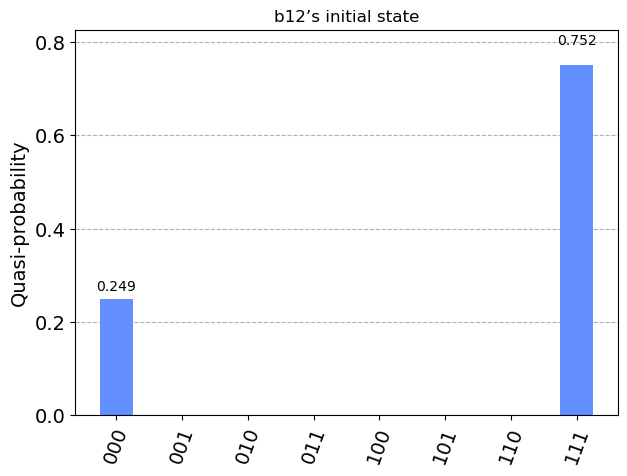

In [7]:
# Count the number of measurement results for b1b2
b12_000 = 0
b12_001 = 0
b12_010 = 0
b12_011 = 0
b12_100 = 0
b12_101 = 0
b12_110 = 0
b12_111 = 0
j=0
for b12_state in counts:
    j=j+1
    if (b12_state[5:8]=='000'):
        b12_000 = b12_000+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='001'):
        b12_001 = b12_001+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='010'):
        b12_010 = b12_010+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='011'):
        b12_011 = b12_011+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='100'):
        b12_100 = b12_100+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='101'):
        b12_101 = b12_101+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='110'):
        b12_110 = b12_110+counts[b12_state]/sum(counts.values())
    if (b12_state[5:8]=='111'):
        b12_111 = b12_111+counts[b12_state]/sum(counts.values())

counts_out_b12 = {'000':b12_000,'001':b12_001,'010':b12_010,'011':b12_011,'100':b12_100,'101':b12_101,'110':b12_110,'111':b12_111}
plot_histogram(counts_out_b12,title='b12’s initial state')

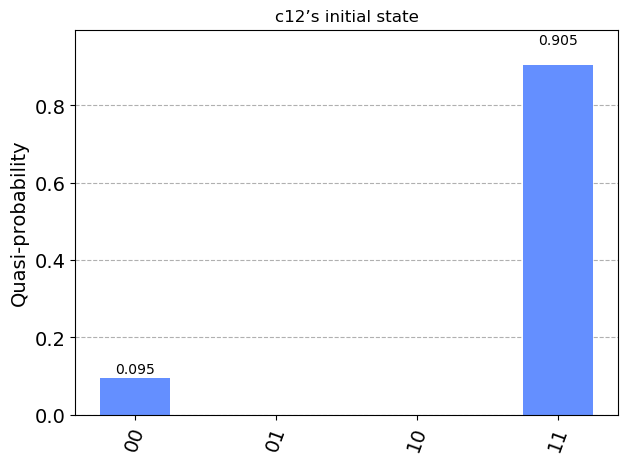

In [8]:
# Count the number of measurement results for c1c2
c12_00 = 0
c12_01 = 0
c12_10 = 0
c12_11 = 0
j=0

for c12_state in counts:
    j=j+1
    if (c12_state[8:10]=='00'):
        c12_00 = c12_00+counts[c12_state]/sum(counts.values())
    if (c12_state[8:10]=='01'):
        c12_01 = c12_01+counts[c12_state]/sum(counts.values())
    if (c12_state[8:10]=='10'):
        c12_10 = c12_10+counts[c12_state]/sum(counts.values())
    if (c12_state[8:10]=='11'):
        c12_11 = c12_11+counts[c12_state]/sum(counts.values())

counts_out_c12 = {'00':c12_00,'01':c12_01,'10':c12_10,'11':c12_11}
plot_histogram(counts_out_c12,title='c12’s initial state')

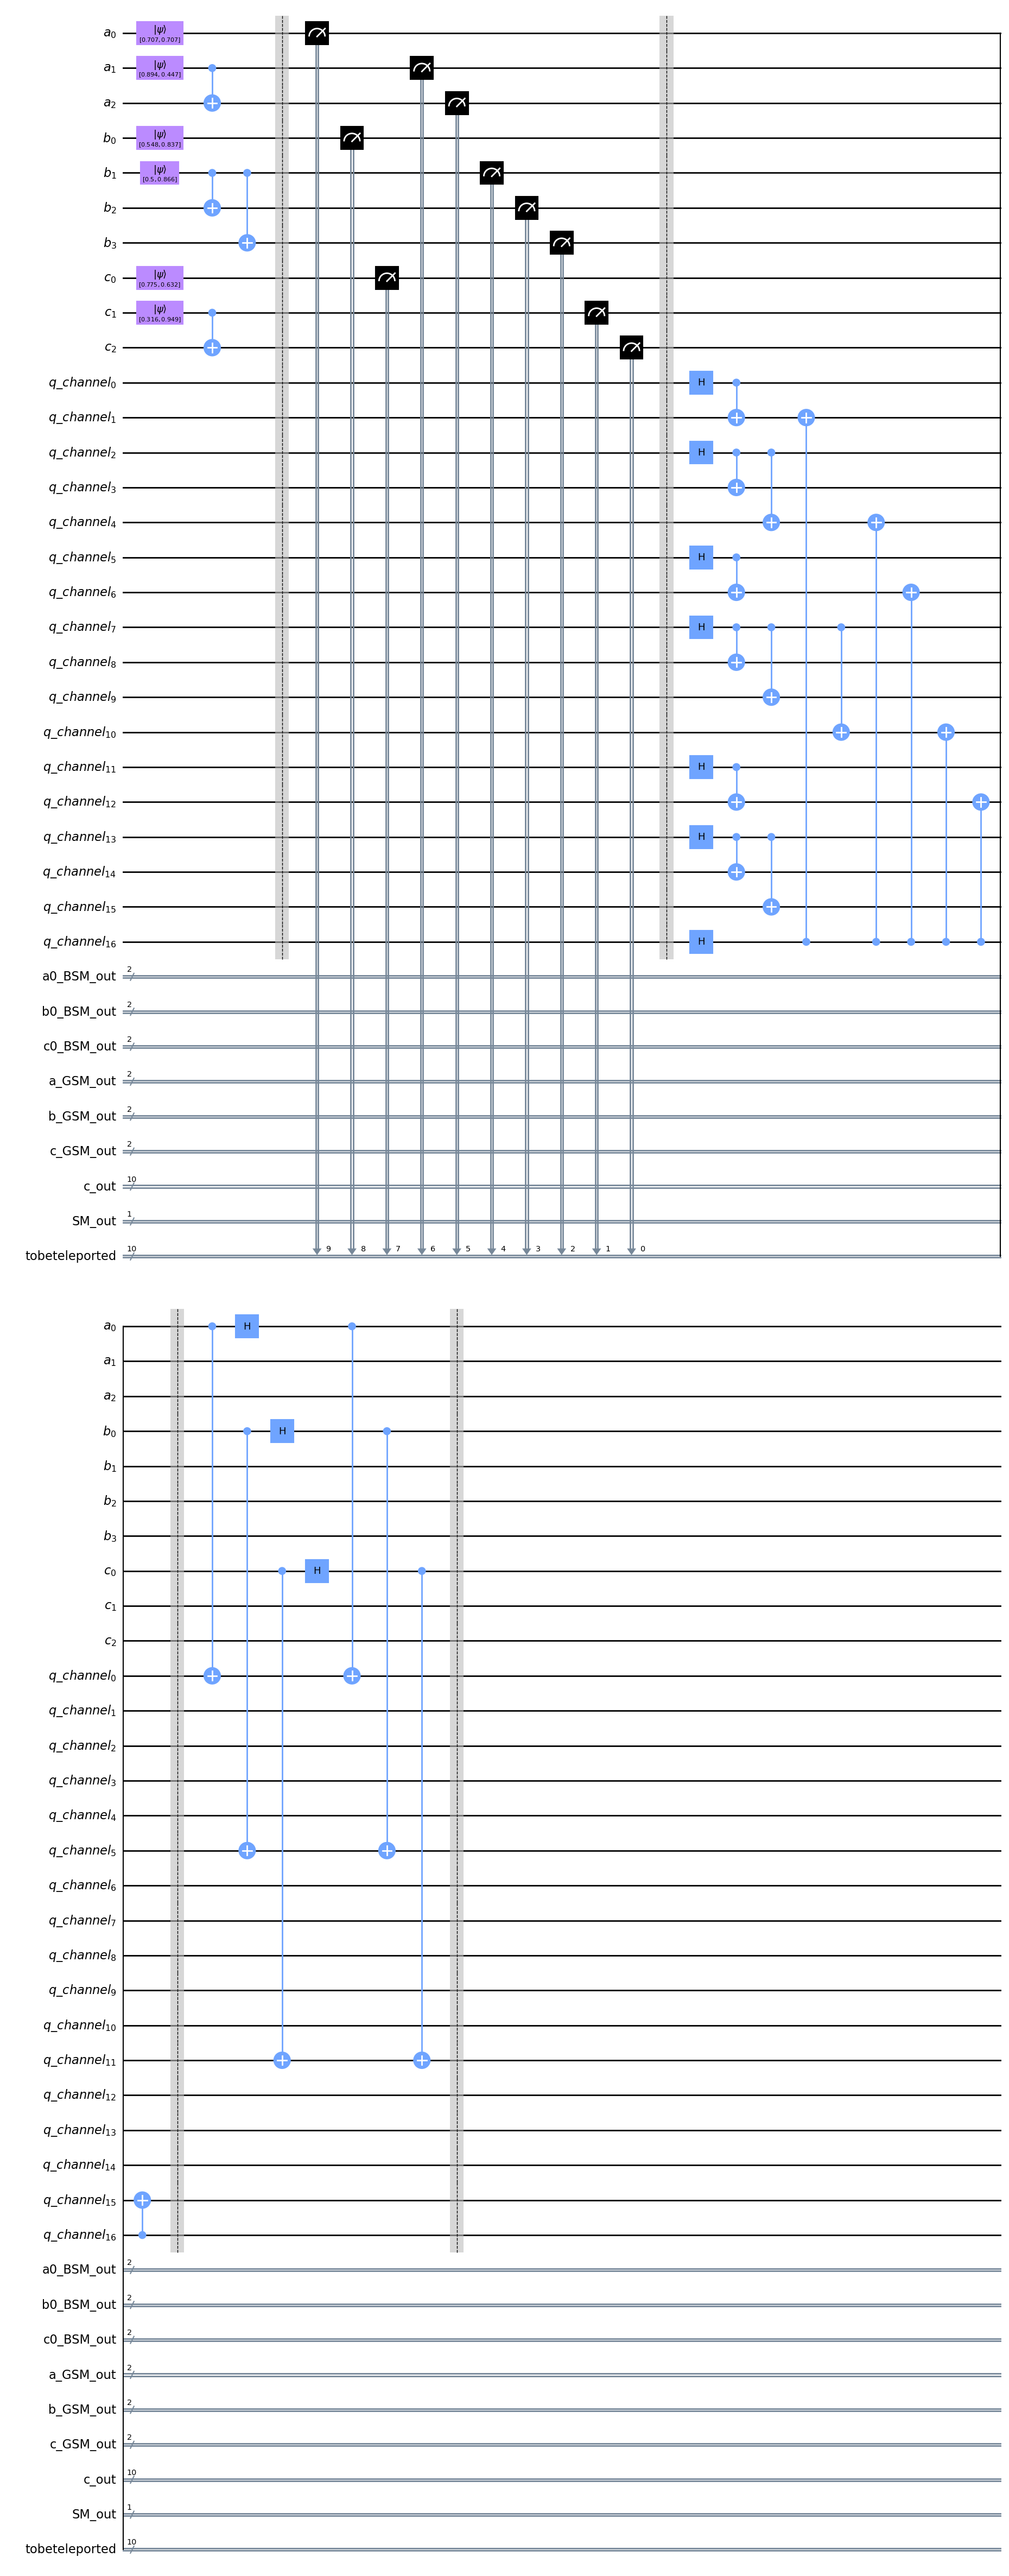

In [11]:
qc_circuit.cx(a[0],q_channel[0])
qc_circuit.cx(b[0],q_channel[5])
qc_circuit.cx(c[0],q_channel[11])

qc_circuit.h(a[0])
qc_circuit.h(b[0])
qc_circuit.h(c[0])

qc_circuit.cx(a[0],q_channel[0])
qc_circuit.cx(b[0],q_channel[5])
qc_circuit.cx(c[0],q_channel[11])
qc_circuit.barrier(a,b,c,q_channel)
qc_circuit.draw(output='mpl')

In [12]:
qc_circuit.cx(a[1],q_channel[2])
qc_circuit.cx(a[1],a[2])
qc_circuit.h(a[1])

In [13]:
qc_circuit.cx(b[1],q_channel[7])
qc_circuit.cx(b[1],b[3])
qc_circuit.cx(b[1],b[2])
qc_circuit.h(b[1])

In [14]:
qc_circuit.cx(c[1],q_channel[13])
qc_circuit.cx(c[1],c[2])
qc_circuit.h(c[1])

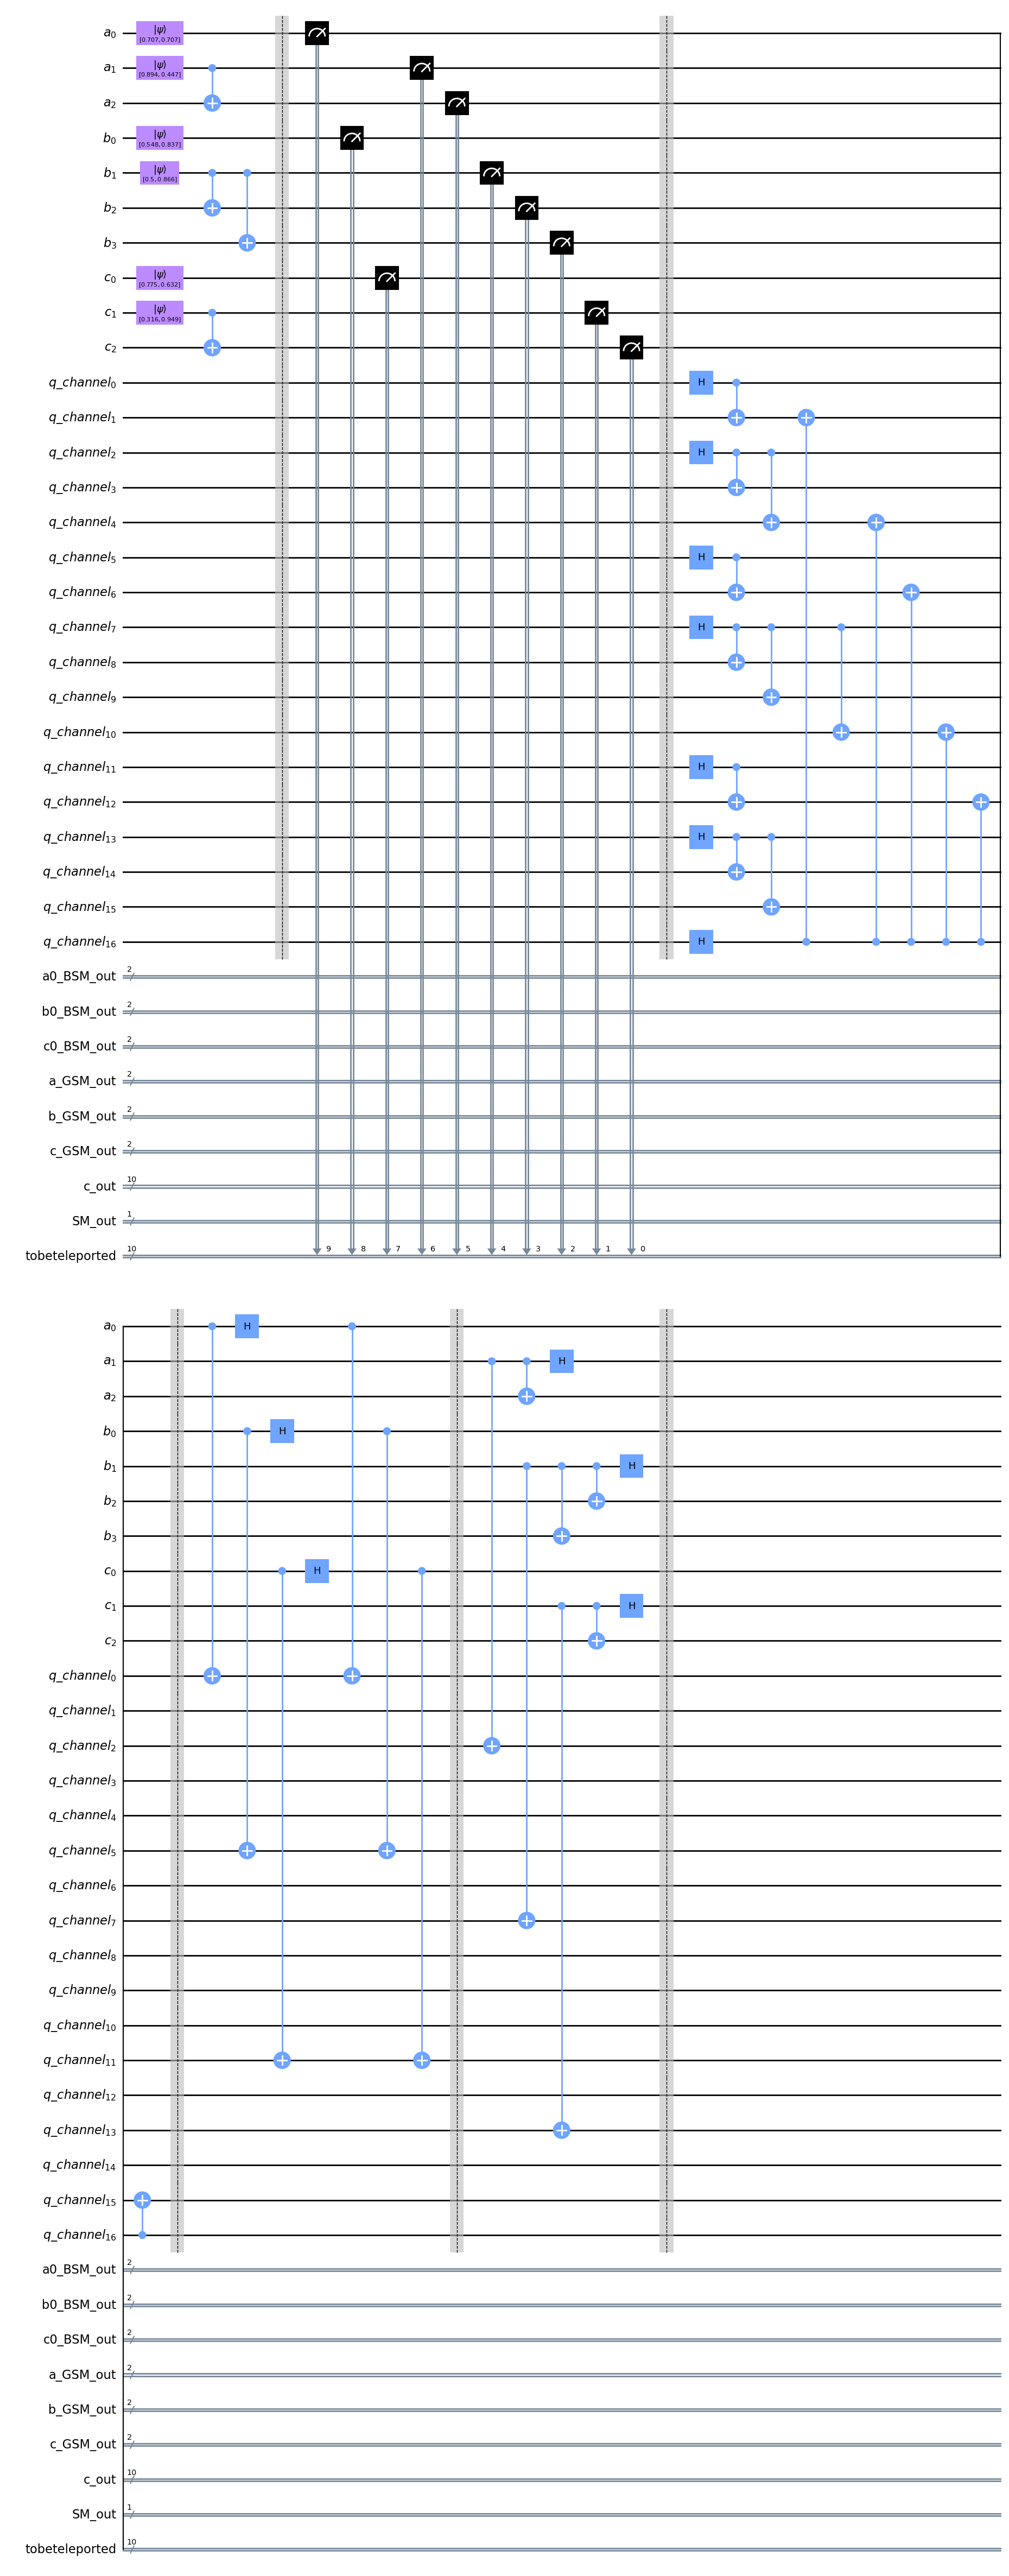

In [15]:
qc_circuit.barrier(a,b,c,q_channel)
qc_circuit.draw(output='mpl')


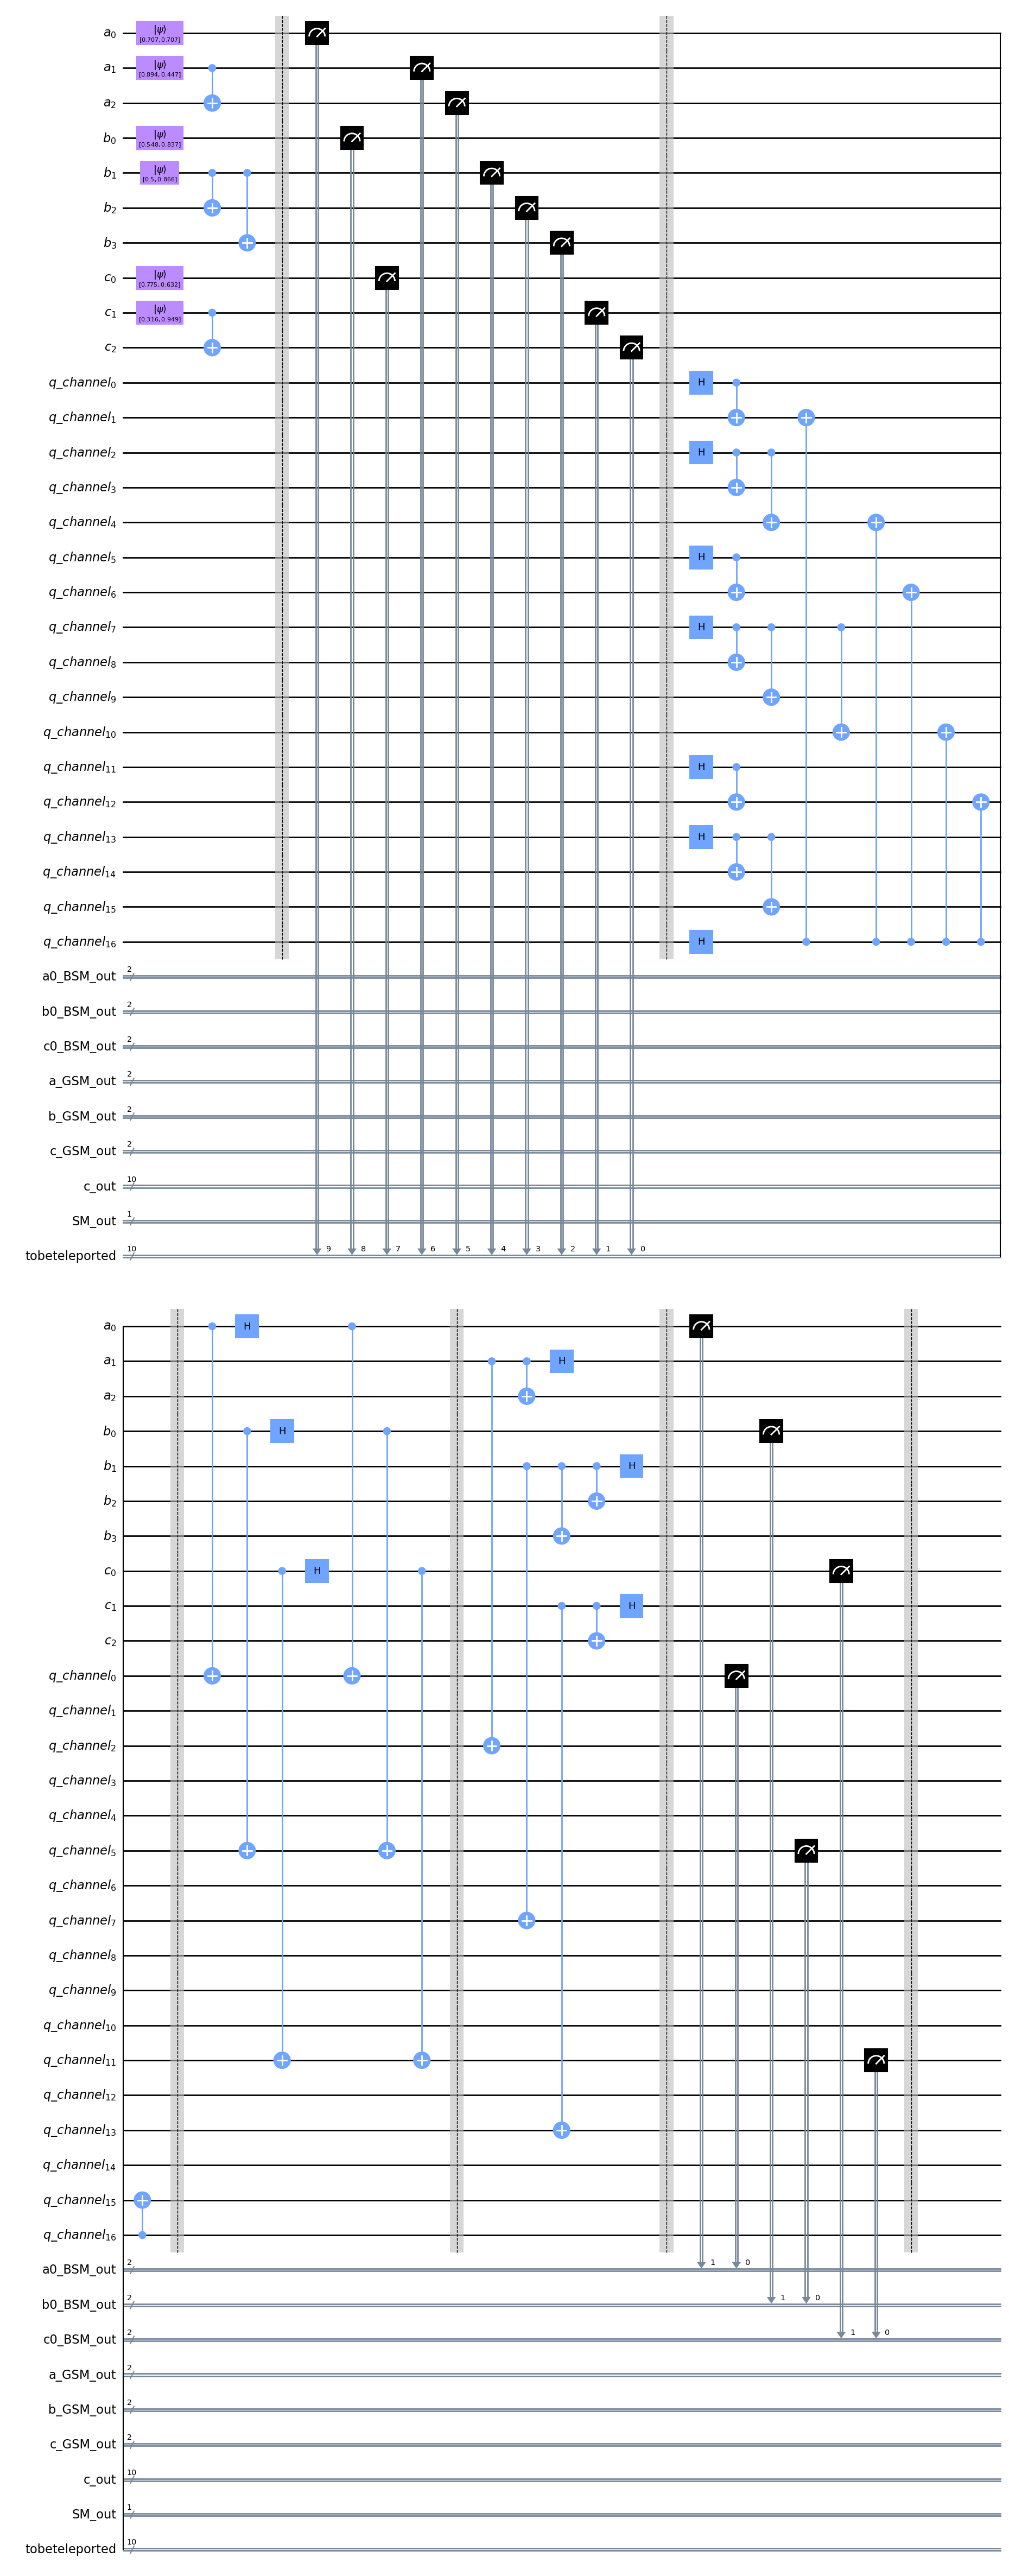

In [16]:
qc_circuit.measure(a[0],a0_BSM_out[1])
qc_circuit.measure(q_channel[0],a0_BSM_out[0])
qc_circuit.measure(b[0],b0_BSM_out[1])
qc_circuit.measure(q_channel[5],b0_BSM_out[0])
qc_circuit.measure(c[0],c0_BSM_out[1])
qc_circuit.measure(q_channel[11],c0_BSM_out[0])

qc_circuit.barrier(a,b,c,q_channel)
qc_circuit.draw(output='mpl')

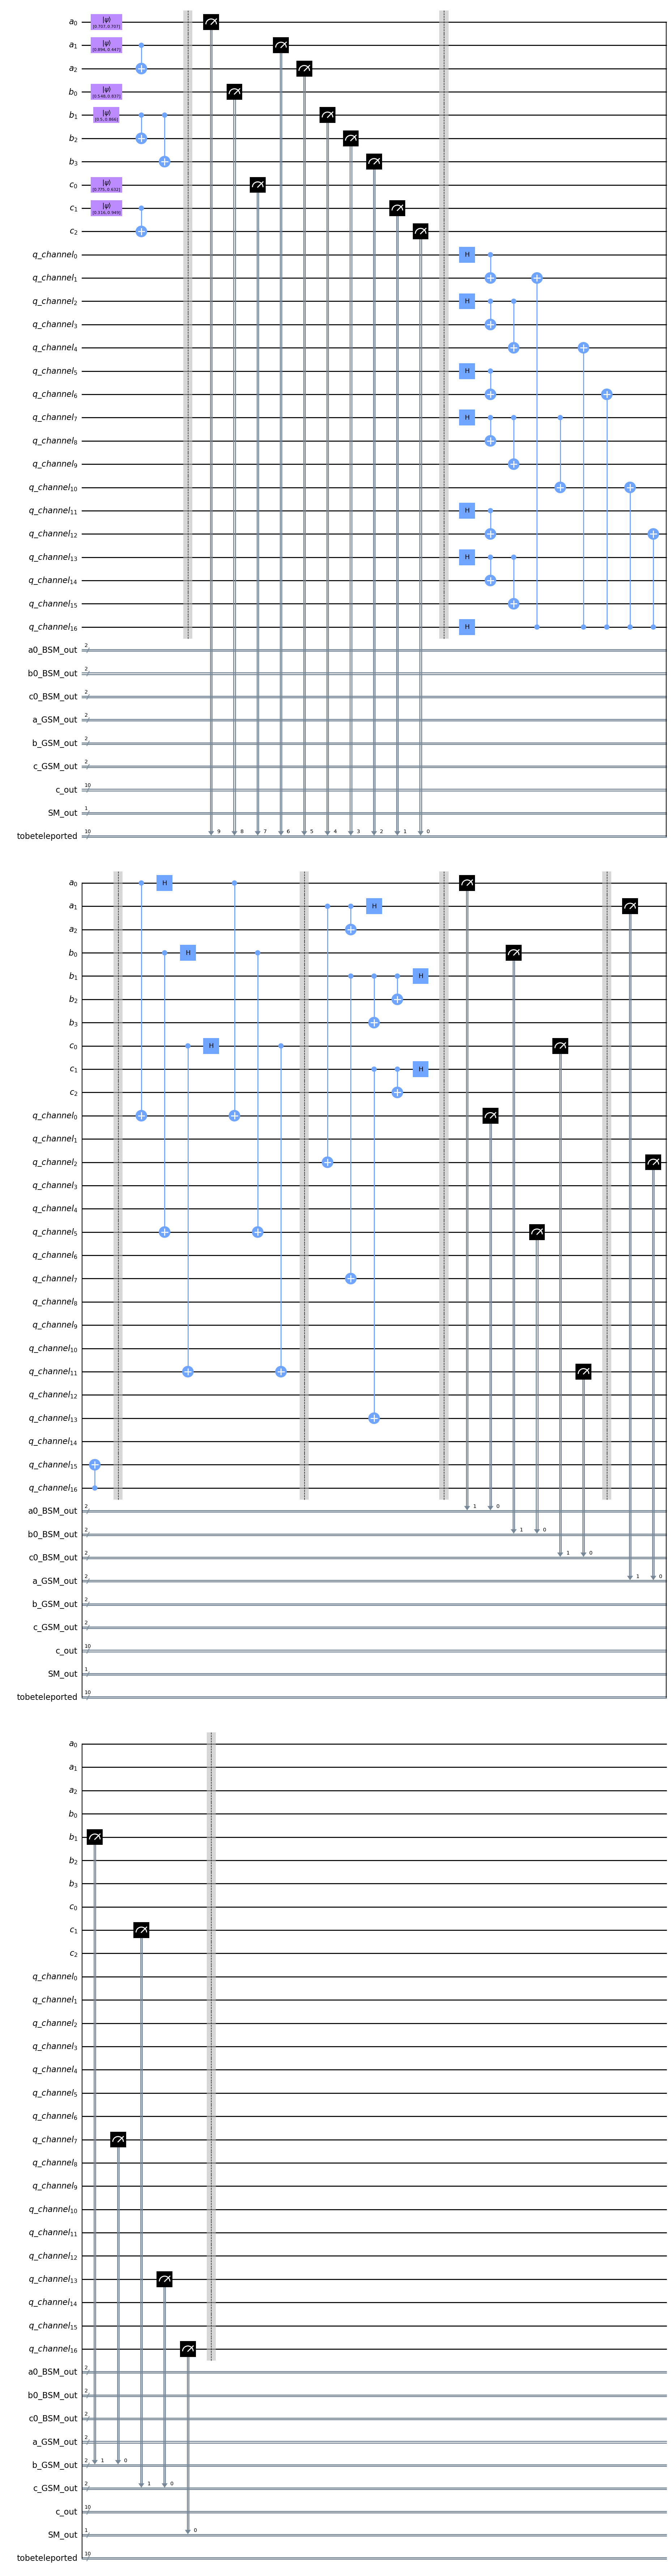

In [17]:
qc_circuit.measure(a[1],a_GSM_out[1])
qc_circuit.measure(q_channel[2],a_GSM_out[0])
qc_circuit.measure(b[1],b_GSM_out[1])
qc_circuit.measure(q_channel[7],b_GSM_out[0])
qc_circuit.measure(c[1],c_GSM_out[1])
qc_circuit.measure(q_channel[13],c_GSM_out[0])

qc_circuit.measure(q_channel[16],SM_out[0])
qc_circuit.barrier(a,b,c,q_channel)
qc_circuit.draw(output='mpl')

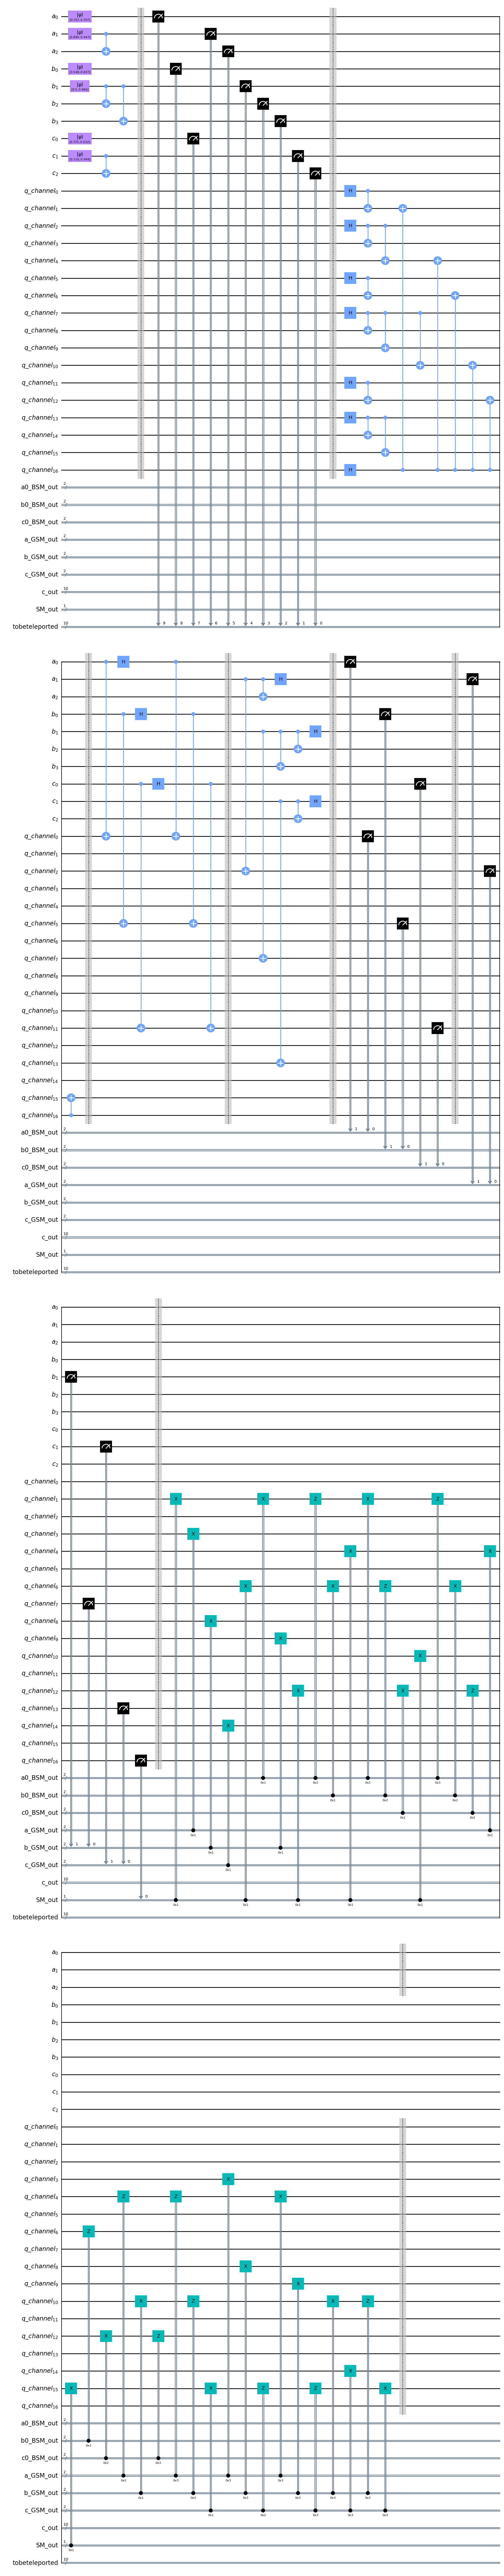

In [18]:
# unitary operation
qc_circuit.x(q_channel[1]).c_if(SM_out,0b1)
# b0
qc_circuit.x(q_channel[6]).c_if(SM_out,0b1)
# c0
qc_circuit.x(q_channel[12]).c_if(SM_out,0b1)
qc_circuit.x(q_channel[4]).c_if(SM_out,0b1)
qc_circuit.x(q_channel[10]).c_if(SM_out,0b1)
qc_circuit.x(q_channel[15]).c_if(SM_out,0b1)

qc_circuit.x(q_channel[1]).c_if(a0_BSM_out,0b01)
qc_circuit.z(q_channel[1]).c_if(a0_BSM_out,0b10)
qc_circuit.x(q_channel[1]).c_if(a0_BSM_out,0b10)
qc_circuit.z(q_channel[1]).c_if(a0_BSM_out,0b11)

qc_circuit.x(q_channel[6]).c_if(b0_BSM_out,0b01)
qc_circuit.z(q_channel[6]).c_if(b0_BSM_out,0b10)
qc_circuit.x(q_channel[6]).c_if(b0_BSM_out,0b10)
qc_circuit.z(q_channel[6]).c_if(b0_BSM_out,0b11)

qc_circuit.x(q_channel[12]).c_if(c0_BSM_out,0b01)
qc_circuit.z(q_channel[12]).c_if(c0_BSM_out,0b10)
qc_circuit.x(q_channel[12]).c_if(c0_BSM_out,0b10)
qc_circuit.z(q_channel[12]).c_if(c0_BSM_out,0b11)

qc_circuit.x(q_channel[3]).c_if(a_GSM_out,0b01)
qc_circuit.x(q_channel[4]).c_if(a_GSM_out,0b01)
qc_circuit.z(q_channel[4]).c_if(a_GSM_out,0b10)
qc_circuit.z(q_channel[4]).c_if(a_GSM_out,0b11)
qc_circuit.x(q_channel[3]).c_if(a_GSM_out,0b11)
qc_circuit.x(q_channel[4]).c_if(a_GSM_out,0b11)

qc_circuit.x(q_channel[8]).c_if(b_GSM_out,0b01)
qc_circuit.x(q_channel[9]).c_if(b_GSM_out,0b01)
qc_circuit.x(q_channel[10]).c_if(b_GSM_out,0b01)
qc_circuit.z(q_channel[10]).c_if(b_GSM_out,0b10)

qc_circuit.x(q_channel[8]).c_if(b_GSM_out,0b11)
qc_circuit.x(q_channel[9]).c_if(b_GSM_out,0b11)
qc_circuit.x(q_channel[10]).c_if(b_GSM_out,0b11)
qc_circuit.z(q_channel[10]).c_if(b_GSM_out,0b11)
qc_circuit.x(q_channel[14]).c_if(c_GSM_out,0b01)
qc_circuit.x(q_channel[15]).c_if(c_GSM_out,0b01)
qc_circuit.z(q_channel[15]).c_if(c_GSM_out,0b10)
qc_circuit.z(q_channel[15]).c_if(c_GSM_out,0b11)
qc_circuit.x(q_channel[14]).c_if(c_GSM_out,0b11)
qc_circuit.x(q_channel[15]).c_if(c_GSM_out,0b11)
qc_circuit.barrier(a,q_channel)
qc_circuit.draw(output='mpl')

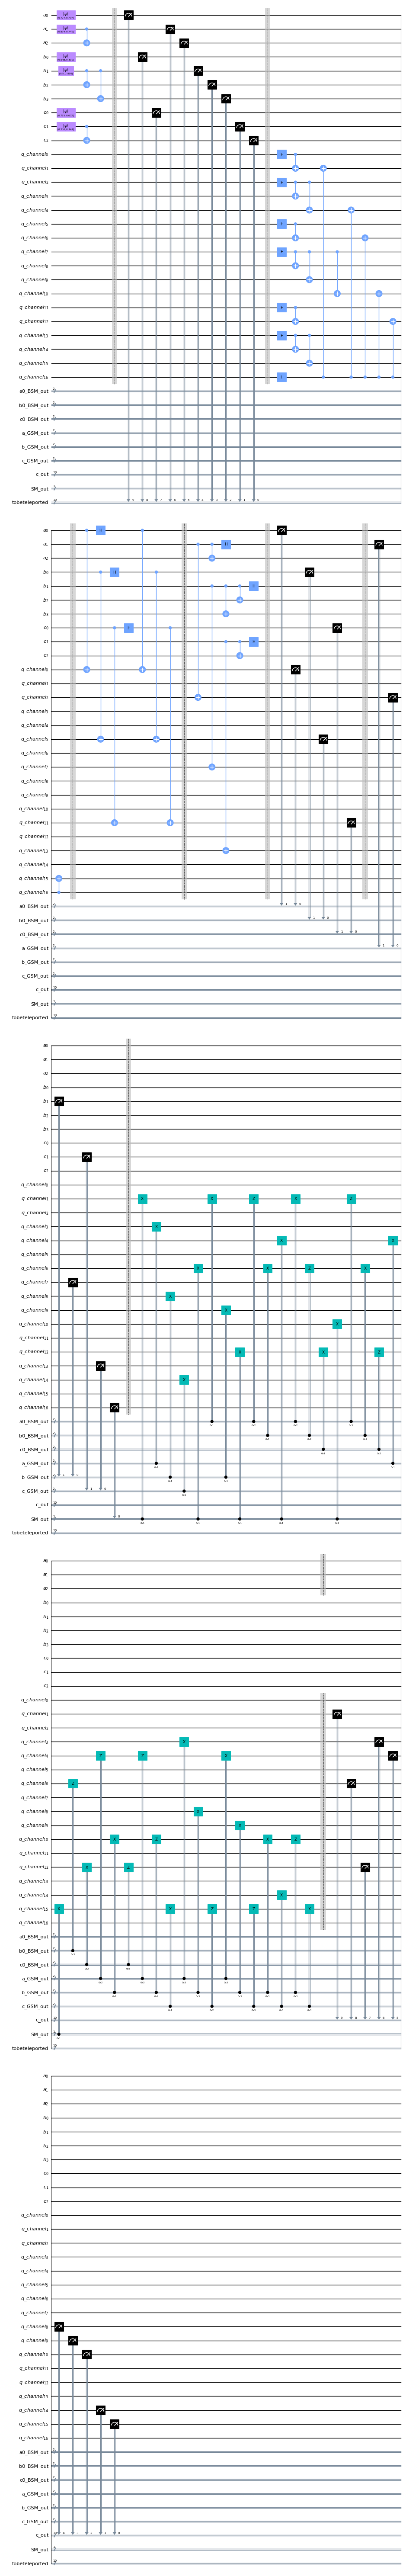

In [19]:
# a0
qc_circuit.measure(q_channel[1],c_out[9])
# b0
qc_circuit.measure(q_channel[6],c_out[8])
# c0
qc_circuit.measure(q_channel[12],c_out[7])
# a1a2
qc_circuit.measure(q_channel[3],c_out[6])
qc_circuit.measure(q_channel[4],c_out[5])
# b1b2
qc_circuit.measure(q_channel[8],c_out[4])
qc_circuit.measure(q_channel[9],c_out[3])
qc_circuit.measure(q_channel[10],c_out[2])

# c1c2
qc_circuit.measure(q_channel[14],c_out[1])
qc_circuit.measure(q_channel[15],c_out[0])
qc_circuit.draw(output='mpl',scale=0.5)

In [20]:
simulator = Aer.get_backend('aer_simulator')
res = transpile(qc_circuit, simulator)

# Run and get counts
result = simulator.run(res, shots=6000).result()
res_counts = result.get_counts(circ_sim)
res_counts
print('Done')

Done


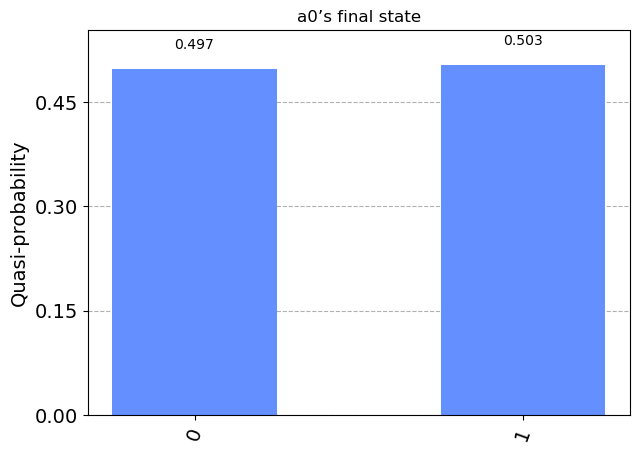

In [21]:
f_a0_0 = 0
f_a0_1 = 0
i=0

for a0_state in res_counts:
    i=i+1
    if (a0_state[13]=='0'):
        f_a0_0 = f_a0_0+res_counts[a0_state]/sum(res_counts.values())
    if (a0_state[13]=='1'):
        f_a0_1 = f_a0_1+res_counts[a0_state]/sum(res_counts.values())

counts_out_f_a0 = {'0':f_a0_0,'1':f_a0_1}

plot_histogram(counts_out_f_a0,title='a0’s final state')

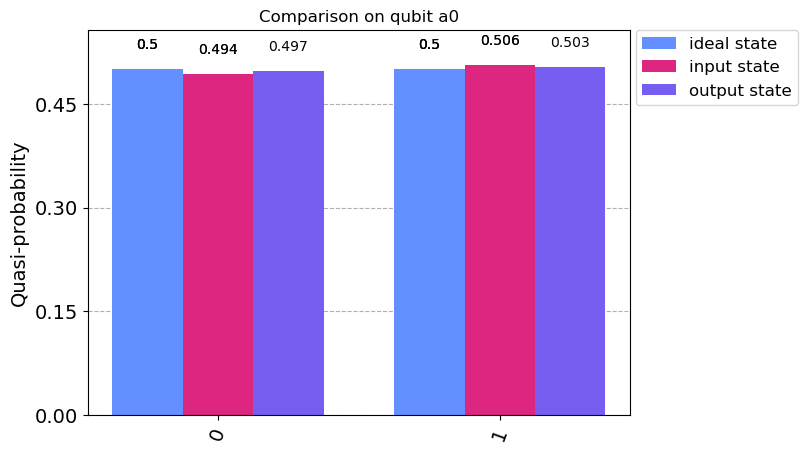

In [22]:
# Compare the input quantum state and the output quantum state.
p_a0_0=np.power(initial_state_a0[0],2)
p_a0_1=np.power(initial_state_a0[1],2)
ideal_a0 = {'0':p_a0_0,'1':p_a0_1}
legend = ['ideal state','input state' , 'output state']
plot_histogram([ideal_a0,counts_out_a0,counts_out_f_a0],legend=legend ,title="Comparison on qubit a0")

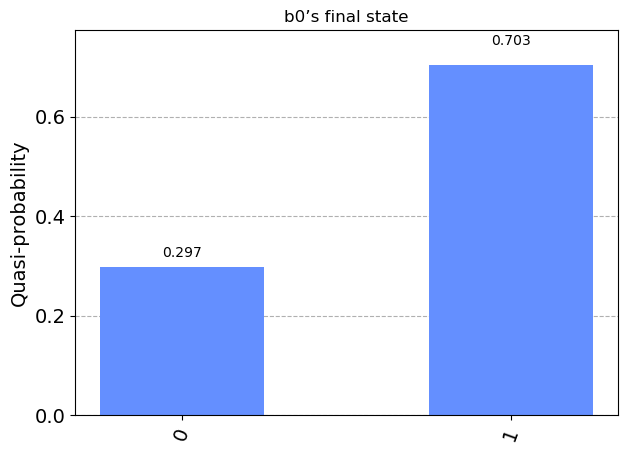

In [23]:
# b0 final state
f_b0_0 = 0
f_b0_1 = 0
i=0

for b0_state in res_counts:
    i=i+1
    if (b0_state[14]=='0'):
        f_b0_0 = f_b0_0+res_counts[b0_state]/sum(res_counts.values())
    if (b0_state[14]=='1'):
        f_b0_1 = f_b0_1+res_counts[b0_state]/sum(res_counts.values())

counts_out_f_b0 = {'0':f_b0_0,'1':f_b0_1}

plot_histogram(counts_out_f_b0,title='b0’s final state')


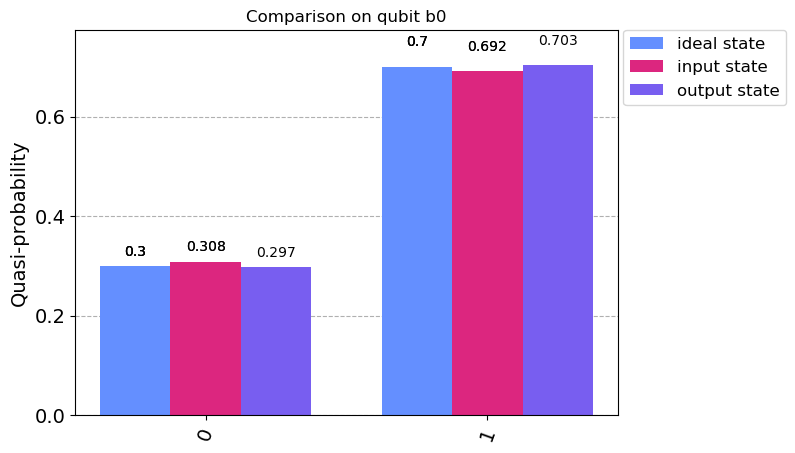

In [24]:
# b0
p_b0_0=np.power(initial_state_b0[0],2)
p_b0_1=np.power(initial_state_b0[1],2)
ideal_b0 = {'0':p_b0_0,'1':p_b0_1}
legend = ['ideal state' , 'input state' , 'output state']
plot_histogram([ideal_b0,counts_out_b0,counts_out_f_b0],legend=legend ,title="Comparison on qubit b0")

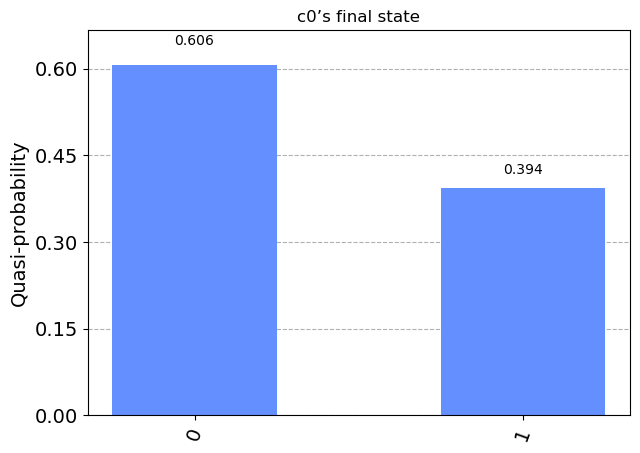

In [25]:
# c0 final state
f_c0_0 = 0
f_c0_1 = 0
i=0

for c0_state in res_counts:
    i=i+1
    if (c0_state[15]=='0'):
        f_c0_0 = f_c0_0+res_counts[c0_state]/sum(res_counts.values())
    if (c0_state[15]=='1'):
        f_c0_1 = f_c0_1+res_counts[c0_state]/sum(res_counts.values())

counts_out_f_c0 = {'0':f_c0_0,'1':f_c0_1}

plot_histogram(counts_out_f_c0,title='c0’s final state')



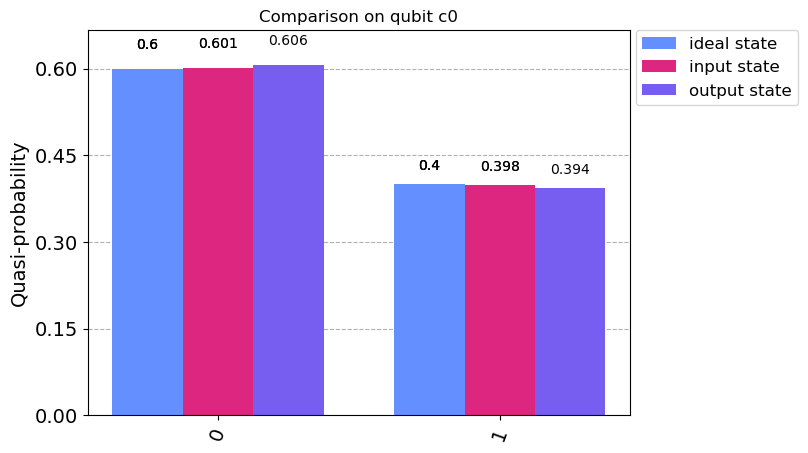

In [26]:
# c0
p_c0_0=np.power(initial_state_c0[0],2)
p_c0_1=np.power(initial_state_c0[1],2)
ideal_c0 = {'0':p_c0_0,'1':p_c0_1}
legend = ['ideal state' , 'input state' , 'output state']
plot_histogram([ideal_c0,counts_out_c0,counts_out_f_c0],legend=legend ,title="Comparison on qubit c0")

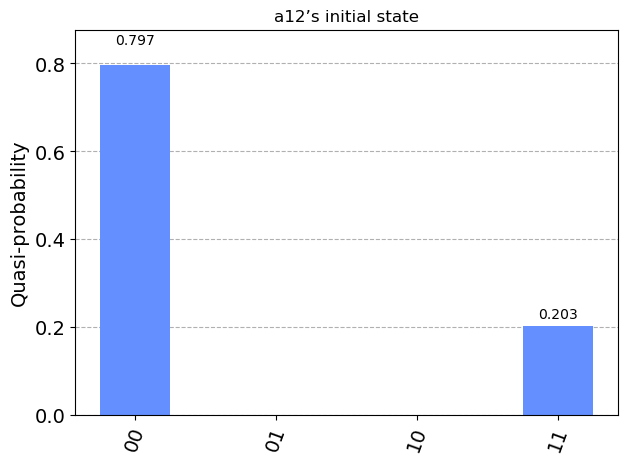

In [27]:
# a1a2 final state
f_a12_00 = 0
f_a12_01 = 0
f_a12_10 = 0
f_a12_11 = 0
j=0
for a12_state in res_counts:
    j=j+1
    if (a12_state[16:18]=='00'):
        f_a12_00 = f_a12_00+res_counts[a12_state]/sum(res_counts.values())
    if (a12_state[16:18]=='01'):
        f_a12_01 = f_a12_01+res_counts[a12_state]/sum(res_counts.values())
    if (a12_state[16:18]=='10'):
        f_a12_10 = f_a12_10+res_counts[a12_state]/sum(res_counts.values())
    if (a12_state[16:18]=='11'):
        f_a12_11 = f_a12_11+res_counts[a12_state]/sum(res_counts.values())

counts_out_f_a12 = {'00':f_a12_00,'01':f_a12_01,'10':f_a12_10,'11':f_a12_11}
plot_histogram(counts_out_f_a12,title='a12’s initial state')

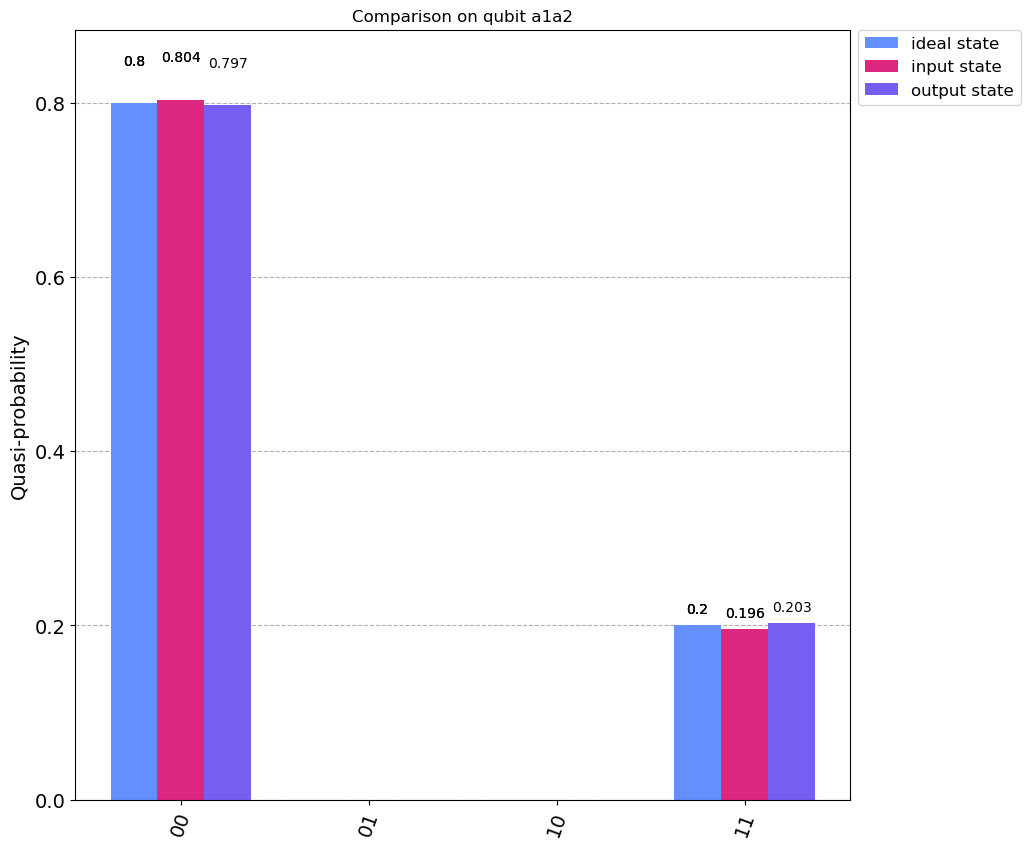

In [28]:
# a12
p_a12_00=np.power(initial_state_a1[0],2)
p_a12_11=np.power(initial_state_a1[1],2)
ideal_a12 = {'00':p_a12_00,'11':p_a12_11}
legend = ['ideal state' , 'input state' , 'output state']
plot_histogram([ideal_a12,counts_out_a12,counts_out_f_a12],legend=legend ,figsize=(10,10),title="Comparison on qubit a1a2")

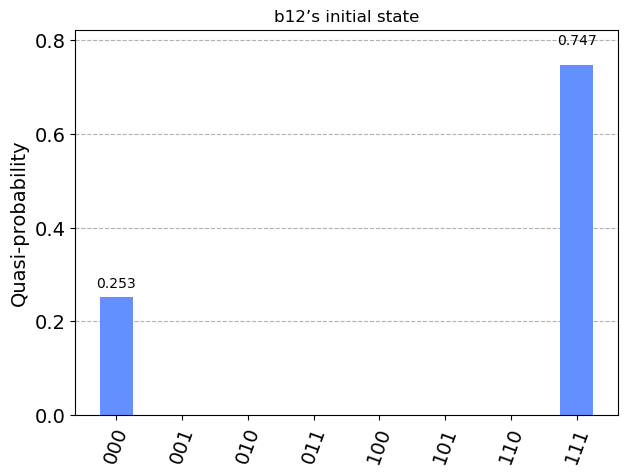

In [29]:
# b1b2 final state
f_b12_000 = 0
f_b12_001 = 0
f_b12_010 = 0
f_b12_011 = 0
f_b12_100 = 0
f_b12_101 = 0
f_b12_110 = 0
f_b12_111 = 0
j=0

for b12_state in res_counts:
    j=j+1
    if (b12_state[18:21]=='000'):
        f_b12_000 = f_b12_000+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='001'):
        f_b12_001 = f_b12_001+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='010'):
        f_b12_010 = f_b12_010+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='011'):
        f_b12_011 = f_b12_011+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='100'):
        f_b12_100 = f_b12_100+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='101'):
        f_b12_101 = f_b12_101+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='110'):
        f_b12_110 = f_b12_110+res_counts[b12_state]/sum(res_counts.values())
    if (b12_state[18:21]=='111'):
        f_b12_111 = f_b12_111+res_counts[b12_state]/sum(res_counts.values())

counts_out_f_b12 = {'000':f_b12_000,'001':f_b12_001,'010':f_b12_010,'011':f_b12_011,'100':f_b12_100,'101':f_b12_101,'110':f_b12_110,'111':f_b12_111}
plot_histogram(counts_out_f_b12,title='b12’s initial state')

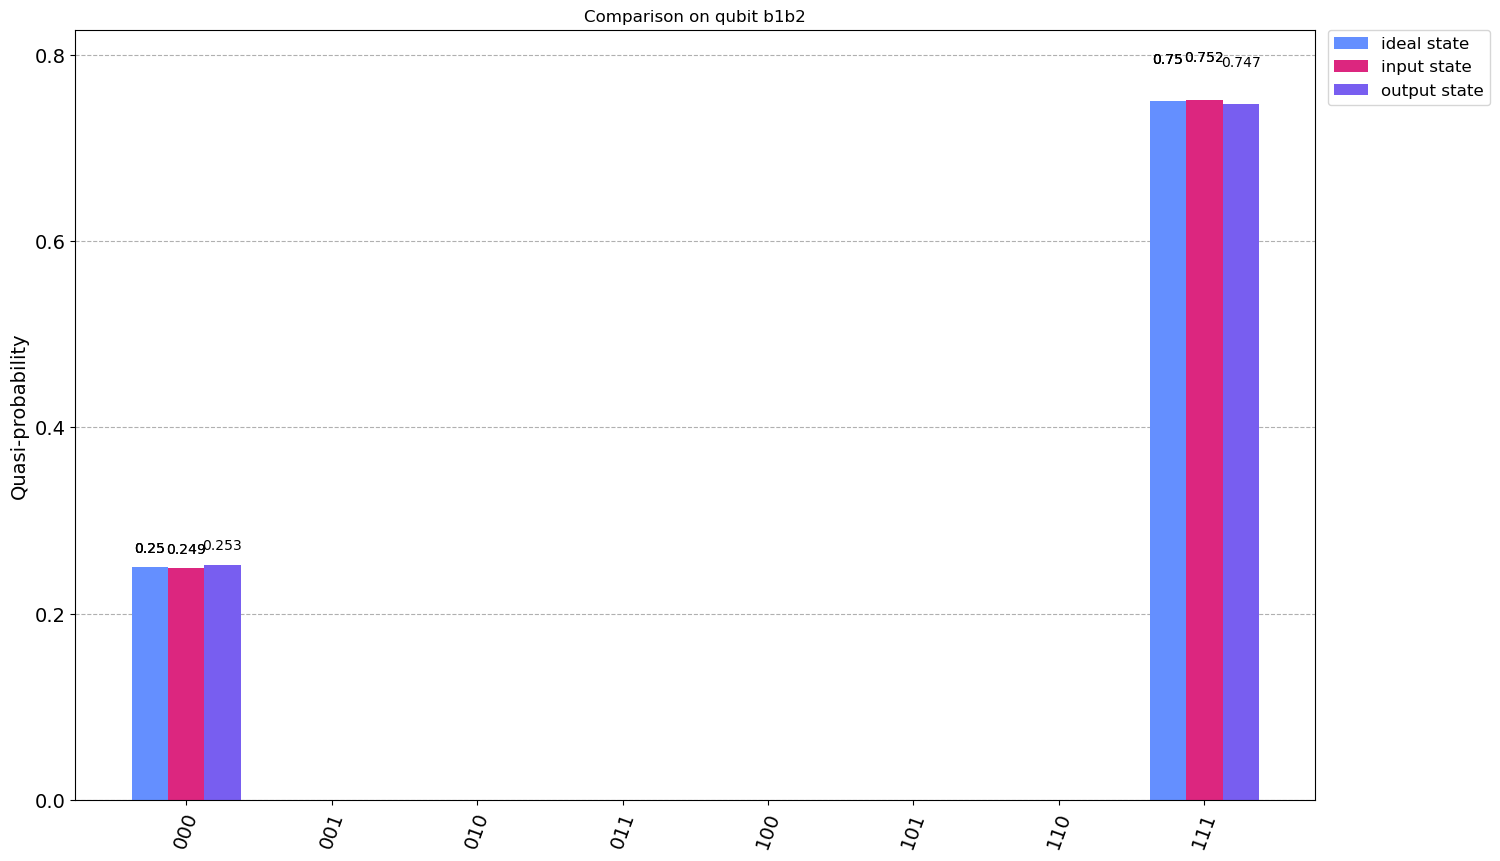

In [30]:
# b123
p_b123_000=np.power(initial_state_b1[0],2)
p_b123_111=np.power(initial_state_b1[1],2)
ideal_b123 = {'000':p_b123_000,'111':p_b123_111}
legend = ['ideal state' , 'input state' , 'output state']
plot_histogram([ideal_b123,counts_out_b12,counts_out_f_b12],legend=legend ,title="Comparison on qubit b1b2",figsize=(16,10))

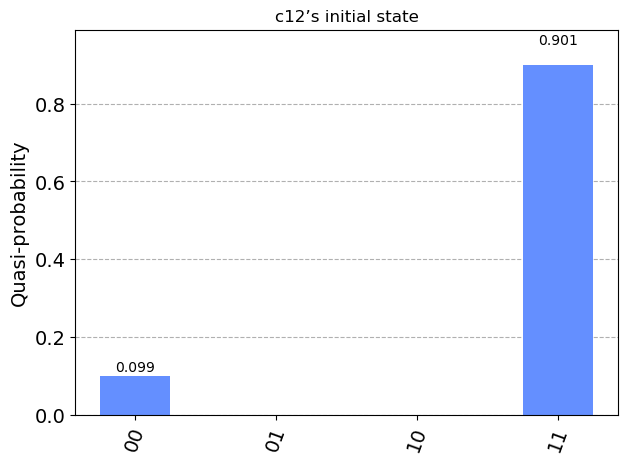

In [31]:
# c1c2 final state
f_c12_00 = 0
f_c12_01 = 0
f_c12_10 = 0
f_c12_11 = 0
j=0

for c12_state in res_counts:
    j=j+1
    if (c12_state[21:23]=='00'):
        f_c12_00 = f_c12_00+res_counts[c12_state]/sum(res_counts.values())
    if (c12_state[21:23]=='01'):
        f_c12_01 = f_c12_01+res_counts[c12_state]/sum(res_counts.values())
    if (c12_state[21:23]=='10'):
        f_c12_10 = f_c12_10+res_counts[c12_state]/sum(res_counts.values())
    if (c12_state[21:23]=='11'):
        f_c12_11 = f_c12_11+res_counts[c12_state]/sum(res_counts.values())

counts_out_f_c12 = {'00':f_c12_00,'01':f_c12_01,'10':f_c12_10,'11':f_c12_11}
plot_histogram(counts_out_f_c12,title='c12’s initial state')

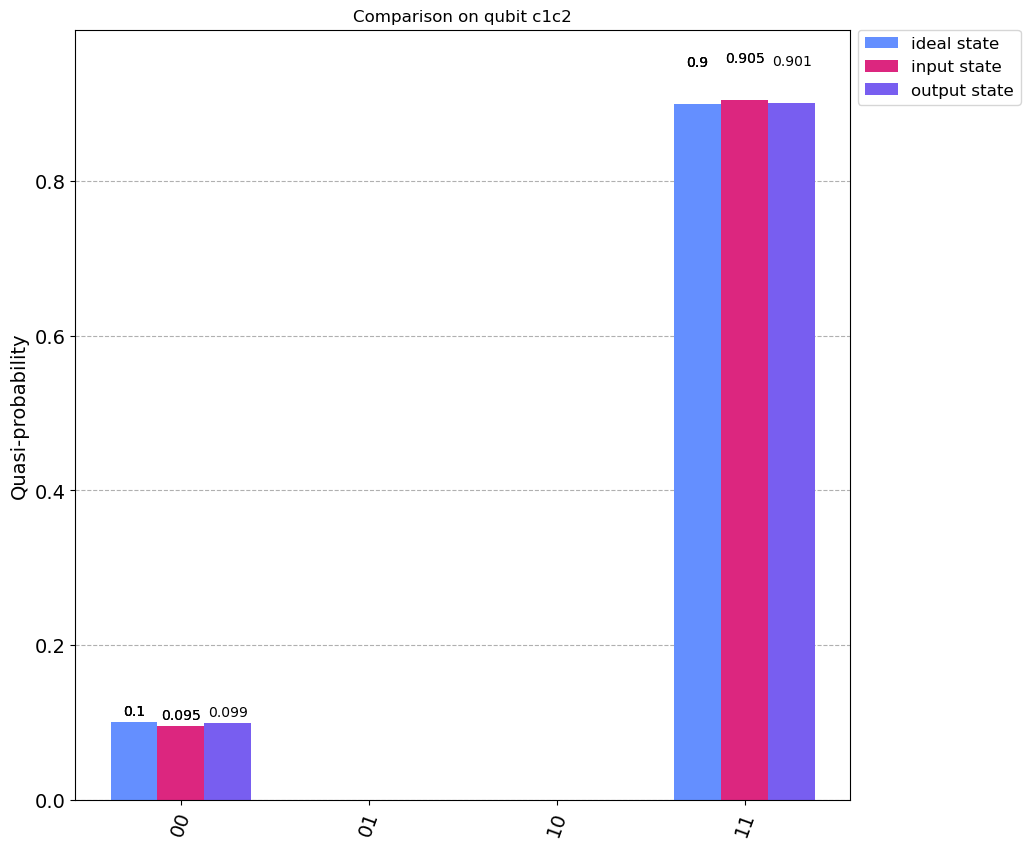

In [32]:
# c12
p_c12_00=np.power(initial_state_c1[0],2)
p_c12_11=np.power(initial_state_c1[1],2)
ideal_c12 = {'00':p_c12_00,'11':p_c12_11}
legend = ['ideal state' , 'input state' , 'output state']
plot_histogram([ideal_c12,counts_out_c12,counts_out_f_c12],legend=legend ,title="Comparison on qubit c1c2",figsize=(10,10))